# About the Data

The dataset is the Average temperature of New York City from 1870-1916. The Dataset is taken from National Oceanic and Atmospheric Administration (NOAA).

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller, acf, pacf

%matplotlib inline

In [11]:
df = pd.read_csv('NewYorkTemperature.csv')

In [12]:
df.shape

(147, 2)

In [13]:
df.head()

,DATE,TAVG
0,1870,53.8
1,1871,51.3
2,1872,51.3
3,1873,50.9
4,1874,51.3


In [8]:
df.dtypes

DATE      int64
TAVG    float64
dtype: object

In [15]:
df.DATE = pd.to_datetime(df.DATE, format='%Y')
df = df.set_index(df.DATE)

In [16]:
df.head()

,DATE,TAVG
DATE,,
1870-01-01,1870-01-01,53.8
1871-01-01,1871-01-01,51.3
1872-01-01,1872-01-01,51.3
1873-01-01,1873-01-01,50.9
1874-01-01,1874-01-01,51.3


In [17]:
df.drop('DATE', axis = 1, inplace=True)

In [18]:
df.head()

,TAVG
DATE,
1870-01-01,53.8
1871-01-01,51.3
1872-01-01,51.3
1873-01-01,50.9
1874-01-01,51.3


# 1. Plot the time series 

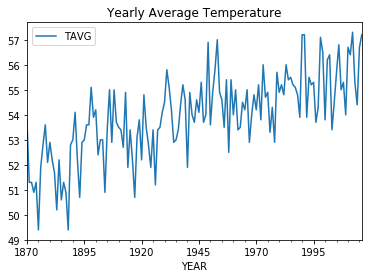

In [23]:
df.plot()
plt.title('Yearly Average Temperature')
plt.xlabel('YEAR')
plt.show()

In [25]:
result = adfuller(df.TAVG)
print("The p-value for the ADF test is ", result[1])

The p-value for the ADF test is  0.583293898787


The data seems to be non stationary.


# 2. Make data set stationary by differencing.

In [27]:
#To take first differences, 
df['diff_1'] = df.TAVG- df.TAVG.shift(1)

In [28]:
df.head()

,TAVG,diff_1
DATE,,
1870-01-01,53.8,NaN
1871-01-01,51.3,-2.5
1872-01-01,51.3,0.0
1873-01-01,50.9,-0.4
1874-01-01,51.3,0.4


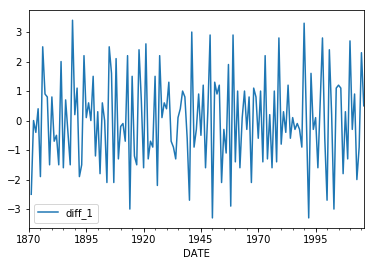

In [29]:
df.plot(y='diff_1')
plt.show()

In [30]:
# differenced data
x_diff = df['diff_1'].iloc[1:]
result = adfuller(x_diff)
print('\nDifferenced Data:')
print('ADF Statistic %f' % result[0])
print('p-value: %f' % result[1])


Differenced Data:
ADF Statistic -8.540297
p-value: 0.000000


This confirms the time series data to be stationary now.

# 3. Generate and Interpret an autocorrelation function (ACF) and PACF.

In [ ]:
x_acf = pd.DataFrame(acf(x_diff))
x_pacf = pd.DataFrame(pacf(x_diff))

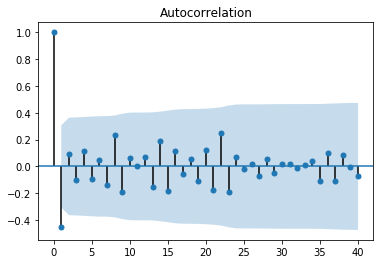

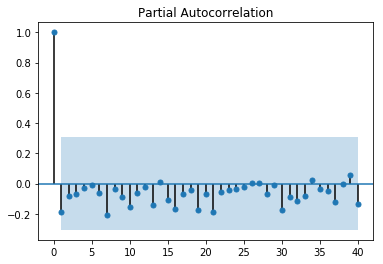

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(x_acf, lags=40)

plot_pacf(x_pacf, lags=40)


plt.show()

There is no clear pattern in the ACF and PACF except the negative lag-1 autocorrelation in the ACF.

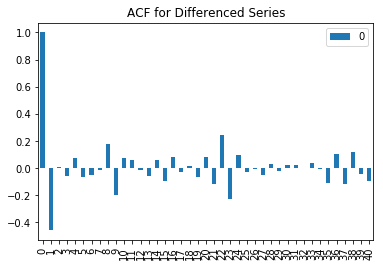

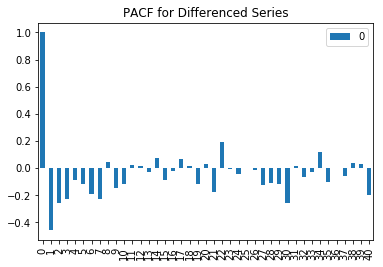

In [49]:
x_acf.plot(kind='bar')
plt.title('ACF for Differenced Series')
plt.show()

x_pacf.plot(kind='bar')
plt.title('PACF for Differenced Series')
plt.show()

# 4. Generate 5 ARIMA specifications (p, d, q) and evaluate their efficacy at modeling the data.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [61]:
df.isnull().sum()

TAVG      0
diff_1    1
dtype: int64

In [64]:
df = df.dropna()

# Question 

the ARIMA modelling should be done on the difference or the actual data???

In [66]:
'''model_010 = ARIMA(df.diff_1, order=(0,1,0))
model_010_fit = model_010.fit()
print(model_010_fit.summary())
print('Residuals Description')
print(model_010_fit.resid.describe())'''

"model_010 = ARIMA(df.diff_1, order=(0,1,0))\nmodel_010_fit = model_010.fit()\nprint(model_010_fit.summary())\nprint('Residuals Description')\nprint(model_010_fit.resid.describe())"

The above combination gives - IndexError: list index out of range

# Question
What is the error below?? could not understand, why and how to resolve.

In [67]:
model_111 = ARIMA(df.diff_1, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [69]:
model_110 = ARIMA(df.diff_1, order=(1,1,0))
model_110_fit = model_110.fit()
print(model_110_fit.summary())
print('Residuals Description')
print(model_110_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.diff_1   No. Observations:                  145
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -303.765
Method:                       css-mle   S.D. of innovations              1.962
Date:                Fri, 06 Jul 2018   AIC                            613.530
Time:                        14:42:12   BIC                            622.460
Sample:                    01-01-1872   HQIC                           617.158
                         - 01-01-2016                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0189      0.098      0.192      0.848      -0.174       0.212
ar.L1.D.diff_1    -0.6610      0.062    -10.667      0.000      -0.782      -0.540
                                    

In [70]:
model_011 = ARIMA(df.diff_1, order=(0,1,1))
model_011_fit = model_011.fit()
print(model_011_fit.summary())
print('Residuals Description')
print(model_011_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.diff_1   No. Observations:                  145
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -270.741
Method:                       css-mle   S.D. of innovations              1.539
Date:                Fri, 06 Jul 2018   AIC                            547.481
Time:                        14:43:16   BIC                            556.411
Sample:                    01-01-1872   HQIC                           551.110
                         - 01-01-2016                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0009      0.003      0.291      0.772      -0.005       0.007
ma.L1.D.diff_1    -1.0000      0.017    -58.517      0.000      -1.033      -0.966
                                    

In [83]:
model_211 = ARIMA(df.diff_1, order=(2,1,1))
model_211_fit = model_211.fit()
print(model_211_fit.summary())
print('Residuals Description')
print(model_211_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.diff_1   No. Observations:                  145
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -248.835
Method:                       css-mle   S.D. of innovations              1.316
Date:                Fri, 06 Jul 2018   AIC                            507.671
Time:                        15:03:25   BIC                            522.554
Sample:                    01-01-1872   HQIC                           513.718
                         - 01-01-2016                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0004      0.001      0.288      0.774      -0.002       0.003
ar.L1.D.diff_1    -0.5847      0.081     -7.195      0.000      -0.744      -0.425
ar.L2.D.diff_1    -0.2636      0.082

In [86]:
model_311 = ARIMA(df.diff_1, order=(3,1,1))
model_311_fit = model_311.fit()
print(model_311_fit.summary())
print('Residuals Description')
print(model_311_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.diff_1   No. Observations:                  145
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -244.577
Method:                       css-mle   S.D. of innovations              1.275
Date:                Fri, 06 Jul 2018   AIC                            501.154
Time:                        15:05:01   BIC                            519.014
Sample:                    01-01-1872   HQIC                           508.411
                         - 01-01-2016                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0002      0.001      0.216      0.829      -0.002       0.002
ar.L1.D.diff_1    -0.6537      0.082     -7.971      0.000      -0.814      -0.493
ar.L2.D.diff_1    -0.4123      0.093

In [89]:
model_411 = ARIMA(df.diff_1, order=(4,1,1))
model_411_fit = model_411.fit()
print(model_411_fit.summary())
print('Residuals Description')
print(model_411_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.diff_1   No. Observations:                  145
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -243.931
Method:                       css-mle   S.D. of innovations              1.268
Date:                Fri, 06 Jul 2018   AIC                            501.862
Time:                        15:06:24   BIC                            522.699
Sample:                    01-01-1872   HQIC                           510.329
                         - 01-01-2016                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0002      0.001      0.203      0.839      -0.002       0.002
ar.L1.D.diff_1    -0.6778      0.084     -8.052      0.000      -0.843      -0.513
ar.L2.D.diff_1    -0.4532      0.099

C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [90]:
comp = pd.DataFrame(
    {'Model' : ['model_110','model_011', 'model_211', 'model_311', 'model_411'],
     'AIC' : [model_110_fit.aic, model_011_fit.aic, model_211_fit.aic, model_311_fit.aic, model_411_fit.aic],
     'BIC' : [model_110_fit.bic, model_011_fit.bic, model_211_fit.bic, model_311_fit.bic, model_411_fit.bic]
    }
     )

In [91]:
comp.sort_values(by= ['AIC', 'BIC'], ascending = [True, True])

,AIC,BIC,Model
3,501.154041,519.014444,model_311
4,501.862041,522.699177,model_411
2,507.670578,522.554247,model_211
1,547.481012,556.411213,model_011
0,613.529714,622.459916,model_110


Best model = AR of order 3 and MA of  order 1

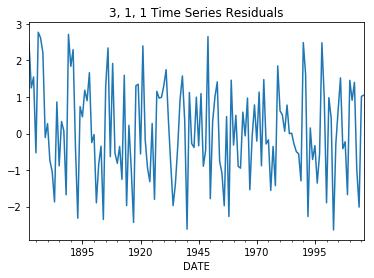

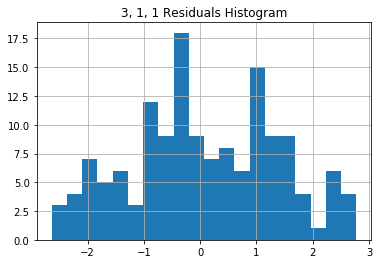

In [92]:
residuals_311 = pd.DataFrame(model_311_fit.resid)
residuals_311.plot(legend=False)
plt.title('3, 1, 1 Time Series Residuals')

residuals_311.hist(bins=20)
plt.title('3, 1, 1 Residuals Histogram')

plt.show()

# 5. Chose best specification and make the case for it as the logical model.¶

In [93]:
import numpy as np

AIC311 =  model_311_fit.aic
AIC411 =  model_411_fit.aic
AIC211 =  model_211_fit.aic

loss_411 = np.exp((AIC311 - AIC411) / 2)
print(loss_411)

loss_211 = np.exp((AIC311 - AIC211) / 2)
print(loss_211)

0.701875174237
0.0384549310738


# Question

Since we found that Model (3,1,1) has the lowest AIC, do we still need to calculate the information loss to decide the best Model ??